# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [15]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
path =r'C:\Users\Usuario\Desktop\gits\lab-linear-regression-correlation\data'
employees = pd.read_csv(path+'/'+'absences.csv')
employees.head(10)

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9
5,5,6,58,7
6,6,7,29,14
7,7,8,36,11
8,8,9,64,5
9,9,10,40,8


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

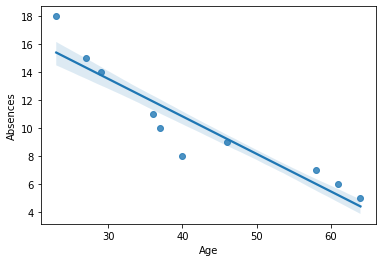

In [7]:
sns.regplot(x="Age", 
            y="Absences", 
            data=employees,
            ci=60)

In [8]:
# your comments here
#There is a pretty clear negative relation between Age and Absence, so the older an employee is, the less absences he has.

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [13]:
def slope_intercept(x,y):
    x_mean = employees[x].mean()
    y_mean = employees[y].mean()
    diff_prods = []
    sqr_xs = []
    for i in range(len(employees[x])):
        prod_diff = (employees[x][i]-x_mean)*(employees[y][i]-y_mean)
        diff_prods.append(prod_diff)
        sqr_x= (employees[x][i]-x_mean)**2
        sqr_xs.append(sqr_x)
    slope = sum(diff_prods)/sum(sqr_xs)
    intercept = y_mean-slope*x_mean
    return intercept, slope

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [14]:
slope_intercept('Age','Absences')

(21.58738189891063, -0.2681088337033404)

In [30]:
y=[5.5008518767102075,21.58738189891063]
print(21.58738189891063-0.2681088337033404*60)
x=[60,0]

5.5008518767102075


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\axisgrid.py:1673: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\axisgrid.py:1742: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


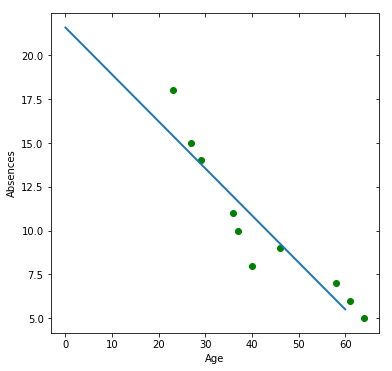

In [31]:
    
grid = sns.JointGrid(employees.Age,employees.Absences, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="g")
plt.plot(x, y, linewidth=2)

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [35]:
def cov_corr(x,y):
    x_mean = employees[x].mean()
    y_mean = employees[y].mean()
    diff_prods = []
    sqr_xs = []
    sqr_ys = []
    for i in range(len(employees[x])):
        prod_diff = (employees[x][i]-x_mean)*(employees[y][i]-y_mean)
        diff_prods.append(prod_diff)
        sqr_x= (employees[x][i]-x_mean)**2
        sqr_xs.append(sqr_x)
        sqr_y= (employees[y][i]-y_mean)**2
        sqr_ys.append(sqr_y)
    variance_x=sum(sqr_xs)/len(sqr_xs)
    variance_y=sum(sqr_ys)/len(sqr_ys)
    covariance = sum(diff_prods)/len(employees[x])
    correlation = covariance/(variance_x*variance_y)**0.5
    return covariance, correlation

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [36]:
cov_corr('Age','Absences')

(-51.92999999999999, -0.9325434092481012)

In [ ]:
#The covariance is the variance for their join distribution, a meassure of dispersion, but since it is in squared units it 
# isnt easy to interpret. The correlation tells us how much the covariance or vairance of the join distribution is explained 
#by the variance of the each of the variables, it is negative but very close to one which tells us the variables a strong negative
#relation.

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [37]:
# We can say that the age and the number of absences are deeply and negatively related. 
#The younger an employee is the more prone he/she is to be absent, each year older a person is makes him/er be 0.26 times less
#than last year. The intercept is not up for interpretation in this case.

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [38]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [39]:
ironbeers_df.cov()

,X,Y
X,18.857143,12.0
Y,12.000000,8.0


In [40]:
ironbeers_df.corr()

,X,Y
X,1.000000,0.977008
Y,0.977008,1.000000


#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

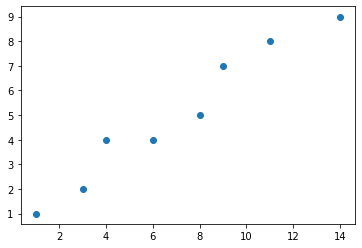

In [42]:
plt.scatter(ironbeers_df.X, ironbeers_df.Y)

In [43]:
#There seems to be a possitive correlation between the number of people you tell to stay and the number of people that actually stay.

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [44]:
def slope_intercept(x,y):
    x_mean = ironbeers_df[x].mean()
    y_mean = ironbeers_df[y].mean()
    diff_prods = []
    sqr_xs = []
    for i in range(len(ironbeers_df[x])):
        prod_diff = (ironbeers_df[x][i]-x_mean)*(ironbeers_df[y][i]-y_mean)
        diff_prods.append(prod_diff)
        sqr_x= (ironbeers_df[x][i]-x_mean)**2
        sqr_xs.append(sqr_x)
    slope = sum(diff_prods)/sum(sqr_xs)
    intercept = y_mean-slope*x_mean
    return intercept, slope

In [45]:
slope_intercept('X','Y')

(0.5454545454545459, 0.6363636363636364)

In [46]:
#The nme of the function is tricky, it return the intercept first, althou again in this case the interpretation doesn't bring any insights.
# The slope indicates us that for every person we tell to stay, 0.64 people are going to, so we have a 64% probability someone stays
#if we tell them too.

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [47]:
#If it was because of me, the relation between me telling them and they staying would be negative, 
#so we conclude that I am not the reason they dont stay.

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here